In [1]:
∑ᵢᵏ = sum
MA(V,i,k)=∑ᵢᵏ(V[i:K])/P
SMA(V, P) = [ K>=P && 0<P<=length(V) ? ∑ᵢᵏ(V[K-P+1:K])/P : NaN for K ∈ 1:length(V)]

SMA (generic function with 1 method)

In [2]:
∑ᵢᵏ = sum
MA(V)= ∑ᵢᵏ(V)/length(V)
SMA(V, P) = [ K>=P && 0<P<=length(V) ? MA(V[K-P+1:K]) : NaN for K ∈ 1:length(V)]

SMA (generic function with 1 method)

In [3]:
using Statistics
BB(V,P,δ) = begin
    μ = SMA(V,P)
    σ = [K>=P && 0<P<=length(V) ? Statistics.std(V[K-P+1:K]) : NaN for K ∈ 1:length(V)]
    
    bh = μ .+ δ.*σ
    bl = μ .- δ.*σ
    (bh,μ,bl)
end

BB (generic function with 1 method)

In [4]:
BB([1,2,3,4,5,6,7,8,9],3,2)

([NaN, NaN, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], [NaN, NaN, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], [NaN, NaN, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])

In [5]:
using Plots, TimeSeries

In [6]:
plotly()

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/konira/.julia/packages/Plots/lW9ll/src/backends.jl:318


Plots.PlotlyBackend()

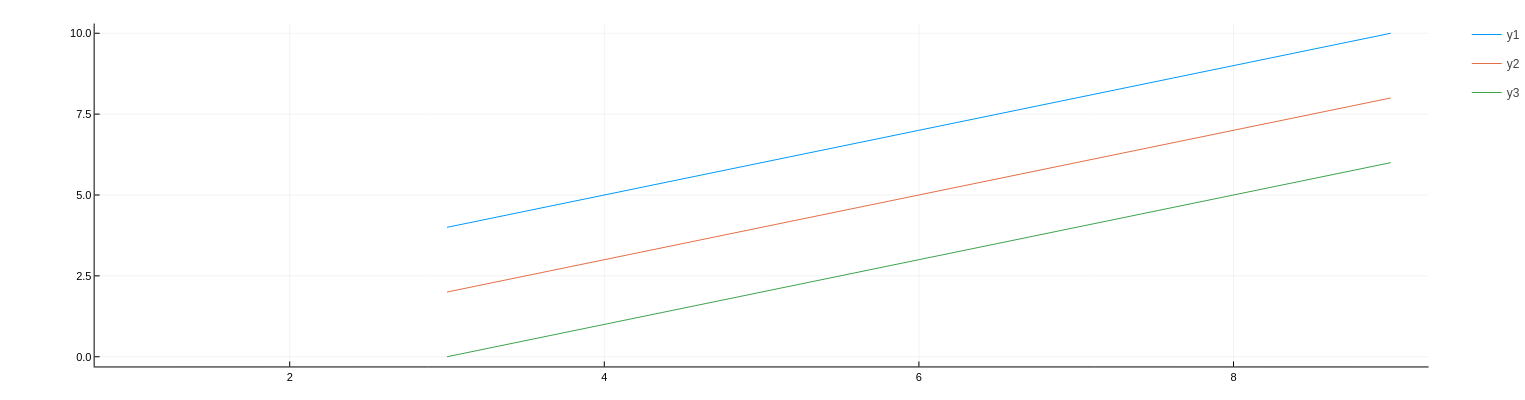

In [7]:
(a,b,c) =BB([1,2,3,4,5,6,7,8,9],3,2)
plot(a)
plot!(b)
plot!(c)

In [13]:
using PyCall
@pyimport vectorbt as vbt
dados = vbt.BinanceData.download("MATICUSDT", start="2022-06-01",interval="1d").get()

/home/konira/.local/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
2022-06-01 03:00:00+00:00 - 2022-09-02 00:00:00+00:00: : 1it [00:01,  1.03s/it]


,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2022-06-02 00:00:00+00:00,0.6000,0.6220,0.5910,0.6200,55084190.6,2022-06-02 23:59:59.999000+00:00,3.329419e+07,65391,27563410.9,1.666588e+07
2022-06-03 00:00:00+00:00,0.6200,0.6210,0.5760,0.5890,38172169.4,2022-06-03 23:59:59.999000+00:00,2.265342e+07,52061,18340028.5,1.088590e+07
2022-06-04 00:00:00+00:00,0.5890,0.6010,0.5760,0.5960,22906167.9,2022-06-04 23:59:59.999000+00:00,1.353454e+07,35125,12219460.3,7.220763e+06
2022-06-05 00:00:00+00:00,0.5960,0.6070,0.5840,0.5980,24801520.7,2022-06-05 23:59:59.999000+00:00,1.474519e+07,33077,12943020.1,7.701394e+06
2022-06-06 00:00:00+00:00,0.5980,0.6560,0.5950,0.6330,72763913.4,2022-06-06 23:59:59.999000+00:00,4.629146e+07,88415,39256053.2,2.498244e+07
...,...,...,...,...,...,...,...,...,...,...
2022-08-29 00:00:00+00:00,0.7827,0.8211,0.7617,0.8168,102998979.9,2022-08-29 23:59:59.999000+00:00,8.176315e+07,253410,48681732.7,3.859919e+07
2022-08-30 00:00:00+00:00,0.8165,0.8441,0.7827,0.8153,85386455.6,2022-08-30 23:59:59.999000+00:00,6.964019e+07,204794,43733889.7,3.568159e+07
2022-08-31 00:00:00+00:00,0.8153,0.8567,0.8153,0.8323,80353318.7,2022-08-31 23:59:59.999000+00:00,6.692875e+07,214619,42434665.4,3.533760e+07


In [14]:
using DataFrames

In [15]:
matic = DataFrame(timestamp=dados.index .|> c->c ,Close=dados.Close .|> c->c ,Open=dados.Open .|> c->c ,High=dados.High .|> c->c,Low=dados.Low .|> c->c)

,timestamp,Close,Open,High,Low
,DateTime,Float64,Float64,Float64,Float64
1,2022-06-02T00:00:00,0.62,0.6,0.622,0.591
2,2022-06-03T00:00:00,0.589,0.62,0.621,0.576
3,2022-06-04T00:00:00,0.596,0.589,0.601,0.576
4,2022-06-05T00:00:00,0.598,0.596,0.607,0.584
5,2022-06-06T00:00:00,0.633,0.598,0.656,0.595
6,2022-06-07T00:00:00,0.617,0.632,0.634,0.583
7,2022-06-08T00:00:00,0.606,0.618,0.633,0.601
8,2022-06-09T00:00:00,0.634,0.607,0.652,0.602
9,2022-06-10T00:00:00,0.594,0.634,0.663,0.59


In [16]:
(bh,μ,bl) = BB(matic.Close,20,2)

([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  1.0303036956699727, 1.027423496846814, 1.029808326988557, 1.0276073940039678, 1.0241079094619205, 1.0215283265836692, 1.0126725554804124, 1.0055932771137923, 0.999050542015166, 0.9704098733189332], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  0.891675, 0.8861900000000003, 0.8790650000000001, 0.8739600000000001, 0.86699, 0.8632899999999999, 0.8571500000000001, 0.8527099999999999, 0.8502099999999999, 0.8438800000000001], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  0.7530463043300273, 0.7449565031531865, 0.7283216730114433, 0.7203126059960322, 0.7098720905380796, 0.7050516734163306, 0.7016274445195878, 0.6998267228862075, 0.7013694579848339, 0.7173501266810669])

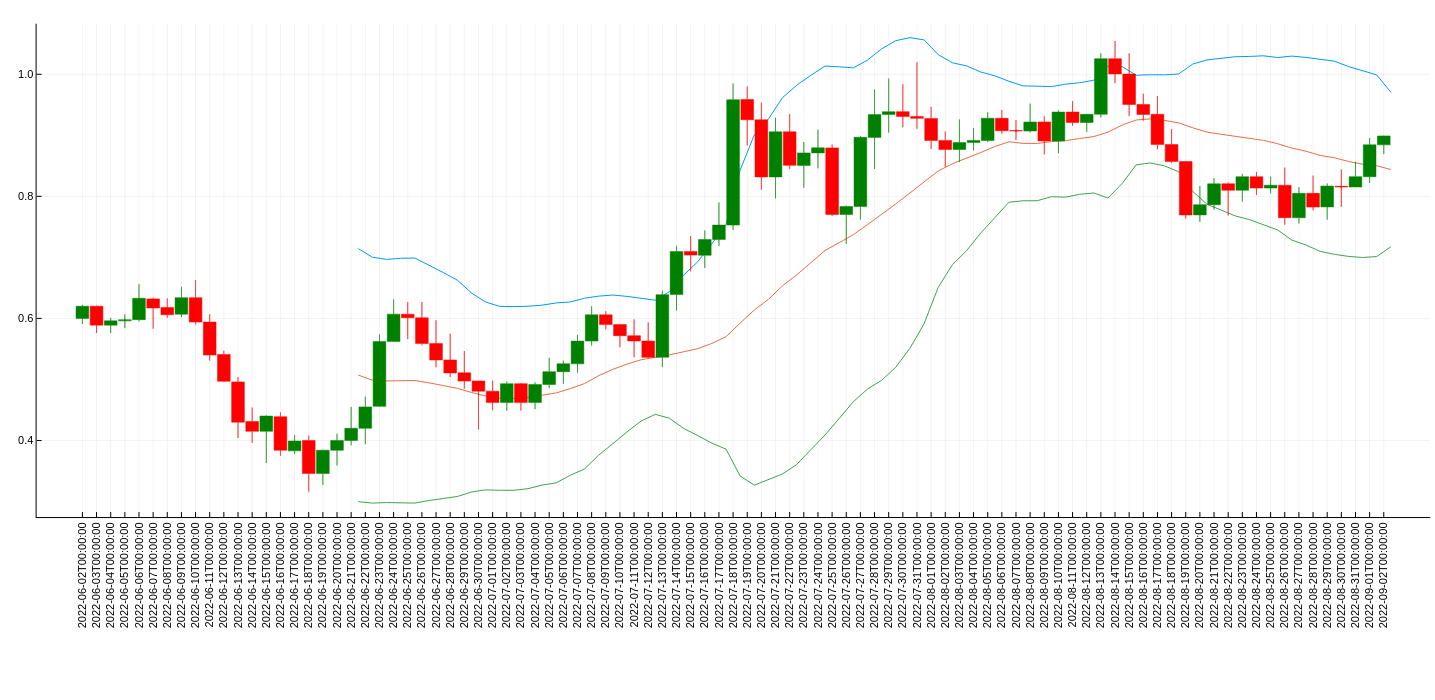

In [24]:

with(:plotly, size=(1200,700)) do
      plot(bh)
    plot!(μ)
    plot!(bl)
    p=plot!(TimeArray(matic, timestamp = :timestamp), seriestype = :candlestick)

end

In [19]:
savefig(p,"plo.html")